In [ ]:
# Dr. Steven C. Lindo
# Assignment 2 - MCP Neuron 
# Oct 2021
# -    -    -    -    -    -     
import numpy as np
import pandas as pd

In [ ]:
ITERATIONS = 25
SAMPLE = 20

In [ ]:
X = np.array([[0,1,0], [0,0,1], [1,1,0], [1,0,1]])
y = np.array([[0],[0],[1],[1]])

# Need the shape m x n
s = X.shape
m = s[0]
n = s[1]

w = np.random.randn(n,1)
p = np.zeros((len(X),1))

print(X.shape)
print(y.shape)

(4, 3)
(4, 1)


In [ ]:
df_w = pd.DataFrame(w)
df_p = pd.DataFrame(p)
df_w

,0
0,0.965617
1,-0.177240
2,-0.041288


In [ ]:
def sigmoid(x):
  ans = (1/(1+np.e**(-x)))
  return ans

def derivative_sigmoid(x):
  ans = sigmoid(x) * (1 - sigmoid(x))
  return ans

In [ ]:
iter = ITERATIONS
for i in range(iter):
  # compute the dot product based on the weight = net
  net = np.dot(X,w).round(3)

  prob = []
  for num in net:
    prob.append(sigmoid(num))
    prob_update = np.array(prob)

  df_p[i+1] = prob_update
  err = y - prob_update

  w_err = []
  for num in err:
    w_err.append(derivative_sigmoid(num))
  
  delta = err * w_err
  update_weights = np.dot(X.T, delta)
  df_w[i+1] = update_weights
  w = update_weights

print(df_w)

         0         1         2   ...        23        24        25
0  0.965617  0.145892  0.223866  ...  0.213630  0.213736  0.213630
1 -0.177240 -0.031973 -0.004281  ... -0.010171 -0.010118 -0.010171
2 -0.041288 -0.045759 -0.002820  ... -0.010171 -0.010118 -0.010171

[3 rows x 26 columns]


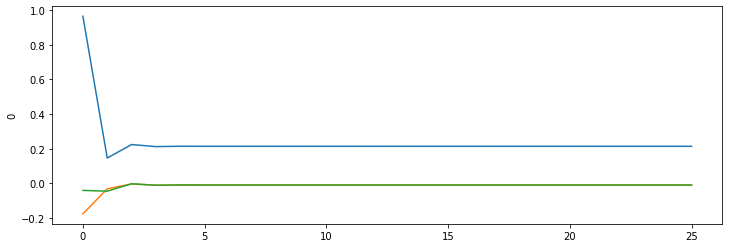

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.lineplot(data=df_w.iloc[0])
sns.lineplot(data=df_w.iloc[1])
sns.lineplot(data=df_w.iloc[2])


In [ ]:
# read in the iris data set and pre-process 
df_iris = pd.read_csv('irisdata.csv')
df_iris.head()

,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# select two of the four features you want to
# work with for this exercise, by dropping two you 
# don't want to work with
data = df_iris.drop(columns=['s_width', 'p_length'])
data.head()

,s_length,p_width,class
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa


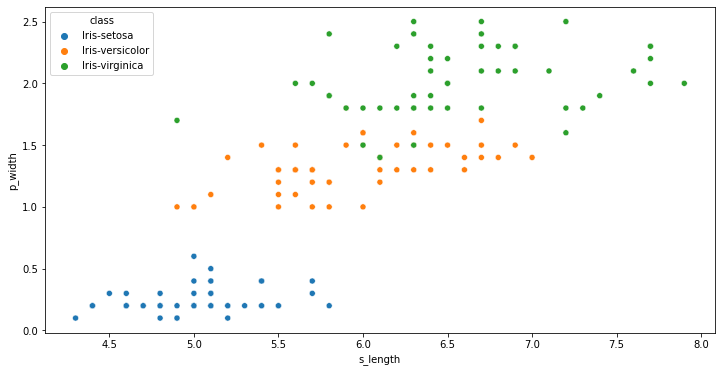

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='s_length', y='p_width', hue='class')

In [ ]:
# if we are training to predict setosa then make it binary
# where 1 = setosa and 0 = NOT setosa
data.loc[data['class'] == 'Iris-setosa', 'class'] = 1
data.loc[data['class'] == 'Iris-virginica', 'class'] = 0
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 0

# now change the features to also be binary
data.loc[data['class'] == 1, 's_length'] = 1
data.loc[data['class'] == 1, 'p_width'] = 1

In [ ]:
# here is the hard part, pretend that someone when and by hand labeled the data such that
# 0 meant that it was no chance it could be a setosa and a 1 meant that is could be a setosa
# based on the s_length, and then based on the s_width.  The following data manimpulation 
# code attempts to do just that.  Might have been easiser to just label them by hand.
data.loc[(data['class'] == 0) & (data['s_length'] < 6), 's_length'] = 1
data.loc[(data['class'] == 0) & (data['p_width'] < 1), 'p_width'] = 1

# everthing else should be set to zeros
data.loc[(data['class'] == 0) & (data['s_length'] != 1), 's_length'] = 0
data.loc[(data['class'] == 0) & (data['p_width'] != 1), 'p_width'] = 0

data_train = data.sample(SAMPLE)

In [ ]:
#X = np.array([[0,1,0], [0,0,1], [1,1,0], [1,0,1]])
#y = np.array([[0],[0],[1],[1]])
# - scl
# because I am dealing with dataframes I am going to use the
# to_numpy() method and make X - Features and y - observations
X = data_train[['s_length', 'p_width']].to_numpy()
y = data_train[['class']].to_numpy()

# Need the shape m x n
s = X.shape
m = s[0]
n = s[1]

w = np.random.randn(n,1)
p = np.zeros((len(X),1))

print(X.shape)
print(y.shape)

(20, 2)
(20, 1)


In [ ]:
data_w = pd.DataFrame(w)
data_p = pd.DataFrame(p)
data_w

,0
0,2.173335
1,-0.968104


In [ ]:
iter = ITERATIONS
for i in range(iter):
  # compute the dot product based on the weight = net
  net = np.dot(X,w)

  prob = []
  for num in net:
    prob.append(sigmoid(num))
    prob_update = np.array(prob)

  data_p[i+1] = prob_update
  err = y - prob_update

  w_err = []
  for num in err:
    w_err.append(derivative_sigmoid(num))
  
  delta = err * w_err
  update_weights = np.dot(X.T, delta)
  data_w[i+1] = update_weights
  w = update_weights


In [ ]:
data_w.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,2.173335,-0.155878,0.405411,0.0064286,0.312098,0.0706662,0.259548,0.109985,0.227599,0.134462,0.207882,0.149763,0.195636,0.159337,0.188007,0.165327,0.183247,0.169075,0.180275,0.171418,0.178419,0.172883,0.177259,0.173799,0.176534,0.174372
1,-0.968104,0.398141,0.733493,0.418233,0.665597,0.469536,0.622902,0.50136,0.596911,0.521212,0.580873,0.533634,0.570914,0.54141,0.564711,0.546277,0.560841,0.549322,0.558425,0.551226,0.556916,0.552417,0.555973,0.553161,0.555384,0.553627


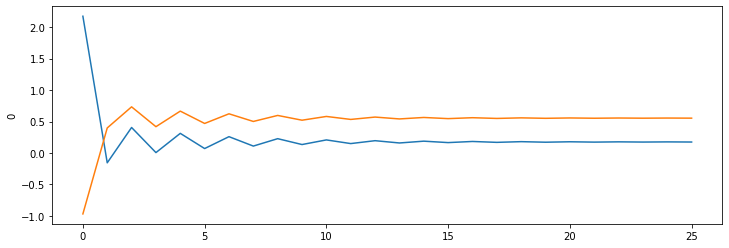

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(data=data_w.iloc[0])
sns.lineplot(data=data_w.iloc[1])